In [1]:
import sys
sys.path.append('euthyroid_sick_syndrome')
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from utils import *

2023-05-19 16:15:58.664497: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 16:15:58.694410: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 16:15:58.695022: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 16:15:59.270933: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#carregando o dataset e utilizando as 8 features retornadas pelo RFE

dataset = pd.read_csv('/home/vinicius/UFERSA/CILAB/euthyroid_sick_syndrome/euthyroid_sick_syndrome/datasets/euthyroid/euthyroid_final_features.csv')
output_label_dataset = dataset['classification']  #1 = sick, 0 = normal
dataset = dataset[['age', 'on_thyroxine', 'query_hypothyroid', 'TSH', 'T3', 'TT4', 'T4U',
'FTI']]


#fazendo o balanceamento dos dados

dataset_res, ouput_label = balance_dataset_smote(dataset, output_label_dataset, random_state=42, k_neighbors=5)

# Dividindo os dados em treino e teste em 80% e 20% respectivamente
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)
input_train, input_test, output_train, output_test = slipt_and_standardize_dataset(dataset=dataset_res, output_label=ouput_label)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/home/vinicius/UFERSA/CILAB/euthyroid_sick_syndrome/cilab/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


368/368 [==============================] - 1s 787us/step - loss: 0.0000e+00 - mse: 0.4980 - val_loss: 0.0000e+00 - val_mse: 0.4929
Epoch 2/100
368/368 [==============================] - 0s 548us/step - loss: 0.0000e+00 - mse: 0.4980 - val_loss: 0.0000e+00 - val_mse: 0.4929
Epoch 3/100
368/368 [==============================] - 0s 536us/step - loss: 0.0000e+00 - mse: 0.4980 - val_loss: 0.0000e+00 - val_mse: 0.4929
Epoch 4/100
368/368 [==============================] - 0s 531us/step - loss: 0.0000e+00 - mse: 0.4980 - val_loss: 0.0000e+00 - val_mse: 0.4929
Epoch 5/100
368/368 [==============================] - 0s 531us/step - loss: 0.0000e+00 - mse: 0.4980 - val_loss: 0.0000e+00 - val_mse: 0.4929
Epoch 6/100
368/368 [==============================] - 0s 529us/step - loss: 0.0000e+00 - mse: 0.4980 - val_loss: 0.0000e+00 - val_mse: 0.4929
Epoch 7/100
368/368 [==============================] - 0s 530us/step - loss: 0.0000e+00 - mse: 0.4980 - val_loss: 0.0000e+00 - val_mse: 0.4929
Epoch 8/100

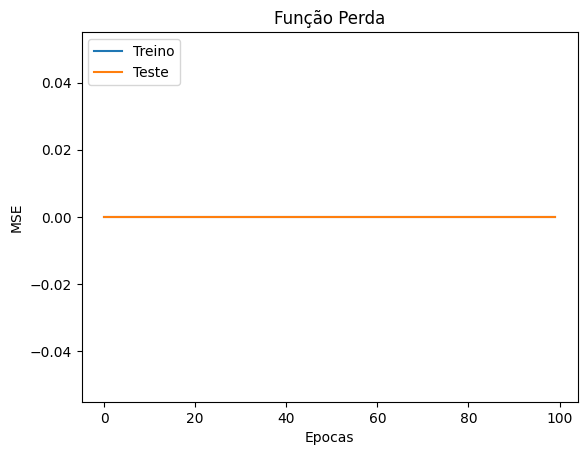

1/1 [==============================] - 0s 36ms/step
A classe é: 1


In [3]:

# Modelo de rede perceptron multicamadas com uma camada oculta de 64 neurônios
# e camada de saída com 1 neurônios (1 classes)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=8, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='softmax'))
model.summary() #visualizando o modelo


# Compile model
# Otimizador Adam com taxa de aprendizado de 0.01
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
# Função de custo categorical_crossentropy (para problemas de classificação com mais de duas classes)
# Métrica de avaliação MSE (Mean Squared Error)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['mse'])

# Train model
history = model.fit(input_train, output_train, validation_split=0.2, epochs=100, batch_size=10)

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Função Perda')
plt.ylabel('MSE')
plt.xlabel('Epocas')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()


#padronizando os dados de teste
sc = StandardScaler()
sc.fit(input_train)


# esse teste é de um paciente doente (1)
teste = [[45, 0, 0, 1.9, 1.0,	82.0,	0.73,	112.0]]
teste = sc.transform(teste)
# Predict
"""
    1 - Sick
    0 - Normal
"""
y_predd = model.predict(teste)
y_predd = np.argmax(y_predd, axis=1)+1 
print("A classe é:",  y_predd[-1])
